In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split , GridSearchCV,cross_val_score,cross_val_predict,cross_validate,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,max_error,r2_score,median_absolute_error,mean_squared_log_error

In [3]:
df=pd.read_csv("H2HBABBA2701.csv")

In [4]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH in,2019-08-28 00:00:00,2019.0,1.929741e+09,2019-08-13,20190813,20190813,20190828.0,USD,RV,1.0,NaN,158207.41,20190813.0,NAC6,1.929741e+09,0
1,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930723e+09,2020-03-30,20200331,20200330,20200414.0,USD,RV,1.0,NaN,52512.16,20200330.0,NAH4,1.930723e+09,1
2,U001,0200769623,WAL-MAR co,2019-08-13 00:00:00,2019.0,1.929686e+09,2019-08-03,20190801,20190803,20190818.0,USD,RV,1.0,NaN,11747.19,20190803.0,NAH4,1.929686e+09,0
3,U001,200783734,FAREW co,2019-02-14 00:00:00,2019.0,1.928714e+09,2019-01-31,20190131,20190131,20190215.0,USD,RV,1.0,NaN,142558.78,20190131.0,NAA8,1.928714e+09,0
4,U001,0200769623,WAL-MAR,2019-06-25 00:00:00,2019.0,1.929491e+09,2019-06-15,20190614,20190615,20190630.0,USD,RV,1.0,NaN,542.11,20190615.0,NAH4,1.929491e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,CCCA02,KRAFT corporation,2019-11-27 00:00:00,2019.0,1.930022e+09,2019-10-18,20191017,20191018,20191122.0,USD,RV,1.0,NaN,12965.40,20191018.0,NAG2,1.930022e+09,0
49996,U001,0200769556,SHAM,2019-11-05 00:00:00,2019.0,1.929991e+09,2019-10-16,20191011,20191016,20191117.0,USD,RV,1.0,NaN,33392.25,20191016.0,NA32,1.929991e+09,0
49997,CA02,140104429,COSTCO trust,2019-06-03 00:00:00,2019.0,2.960549e+09,2019-05-18,20190518,20190518,20190529.0,CAD,RV,1.0,NaN,176427.28,20190519.0,CA10,2.960549e+09,0
49998,U001,0200769623,WAL-MAR corp,2019-11-12 00:00:00,2019.0,1.930091e+09,2019-11-02,20191101,20191102,20191117.0,USD,RV,1.0,NaN,2373.96,20191102.0,NAH4,1.930091e+09,0


In [5]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH in,2019-08-28 00:00:00,2019.0,1.929741e+09,2019-08-13,20190813,20190813,20190828.0,USD,RV,1.0,NaN,158207.41,20190813.0,NAC6,1.929741e+09,0
1,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930723e+09,2020-03-30,20200331,20200330,20200414.0,USD,RV,1.0,NaN,52512.16,20200330.0,NAH4,1.930723e+09,1
2,U001,0200769623,WAL-MAR co,2019-08-13 00:00:00,2019.0,1.929686e+09,2019-08-03,20190801,20190803,20190818.0,USD,RV,1.0,NaN,11747.19,20190803.0,NAH4,1.929686e+09,0
3,U001,200783734,FAREW co,2019-02-14 00:00:00,2019.0,1.928714e+09,2019-01-31,20190131,20190131,20190215.0,USD,RV,1.0,NaN,142558.78,20190131.0,NAA8,1.928714e+09,0
4,U001,0200769623,WAL-MAR,2019-06-25 00:00:00,2019.0,1.929491e+09,2019-06-15,20190614,20190615,20190630.0,USD,RV,1.0,NaN,542.11,20190615.0,NAH4,1.929491e+09,0


In [6]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [8]:
df.corr()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
buisness_year,1.000000,-0.013053,0.977126,0.984006,0.991549,NaN,NaN,0.002779,0.984244,-0.011194,0.753664
doc_id,-0.013053,1.000000,-0.009740,-0.012804,-0.015873,NaN,NaN,0.180197,-0.010486,1.000000,-0.015103
document_create_date,0.977126,-0.009740,1.000000,0.992731,0.975183,NaN,NaN,0.004332,0.991787,-0.007571,0.763012
document_create_date.1,0.984006,-0.012804,0.992731,1.000000,0.981521,NaN,NaN,0.003302,0.999050,-0.009628,0.762657
due_in_date,0.991549,-0.015873,0.975183,0.981521,1.000000,NaN,NaN,0.002654,0.982224,-0.012740,0.755736
posting_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,0.002779,0.180197,0.004332,0.003302,0.002654,NaN,NaN,1.000000,0.004094,0.191493,0.001047
baseline_create_date,0.984244,-0.010486,0.991787,0.999050,0.982224,NaN,NaN,0.004094,1.000000,-0.007193,0.762452
invoice_id,-0.011194,1.000000,-0.007571,-0.009628,-0.012740,NaN,NaN,0.191493,-0.007193,1.000000,-0.013964


In [9]:
c = df.nunique().to_frame(name = 'Count')
c

,Count
business_code,6
cust_number,1442
name_customer,4189
clear_date,399
buisness_year,2
doc_id,48820
posting_date,504
document_create_date,506
document_create_date.1,505
due_in_date,544


In [10]:
df.shape

(50000, 19)

In [11]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999300e+04,50000.000000
mean,2019.305620,2.012633e+09,2.019350e+07,2.019353e+07,2.019367e+07,1.0,NaN,32159.125758,2.019353e+07,2.011584e+09,0.200000
std,0.460674,2.908297e+08,4.499940e+03,4.482899e+03,4.468904e+03,0.0,NaN,38873.159133,4.483388e+03,2.770251e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018121e+07,2.018122e+07,1.0,NaN,0.770000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929322e+09,2.019050e+07,2.019050e+07,2.019052e+07,1.0,NaN,4890.602500,2.019050e+07,1.929322e+09,0.000000
50%,2019.000000,1.929958e+09,2.019091e+07,2.019091e+07,2.019092e+07,1.0,NaN,17523.365000,2.019091e+07,1.929958e+09,0.000000
75%,2020.000000,1.930621e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,46911.795000,2.020013e+07,1.930621e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,660202.550000,2.020052e+07,2.960636e+09,1.000000


In [12]:
df.isnull().any()

business_code             False
cust_number               False
name_customer             False
clear_date                 True
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
area_business              True
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                    False
dtype: bool

In [13]:
nv = df.isnull().sum().to_frame(name = 'NULL_COUNT')

In [14]:
nv

,NULL_COUNT
business_code,0
cust_number,0
name_customer,0
clear_date,10000
buisness_year,0
doc_id,0
posting_date,0
document_create_date,0
document_create_date.1,0
due_in_date,0


In [15]:
nv = nv[nv['NULL_COUNT']>0]
nv

,NULL_COUNT
clear_date,10000
area_business,50000
invoice_id,7


In [16]:
import seaborn
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'SHOW NULL VALUES'}, ylabel='NULL_COUNT'>

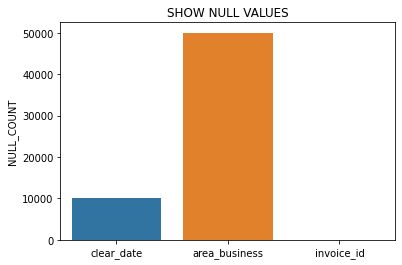

In [17]:
plt.title("SHOW NULL VALUES")
seaborn.barplot(x=nv.index,y=nv.NULL_COUNT)

### Figuring out Null Values

In [18]:
df=df.drop(columns=['area_business'])


In [19]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [20]:
df.shape

(50000, 18)

Dropping null nalues from clear data column

In [21]:
test= df[df['clear_date'].isnull() == True]
df = df.dropna()

In [22]:
test.shape

(10000, 18)

In [23]:
df.isnull().sum().to_frame(name='NULL_LEFT')

,NULL_LEFT
business_code,0
cust_number,0
name_customer,0
clear_date,0
buisness_year,0
doc_id,0
posting_date,0
document_create_date,0
document_create_date.1,0
due_in_date,0


In [24]:
df.shape

(39993, 18)

In [25]:
print('loss of data after deleting null value tuples')
k=(50000-39993)/50000
print(k*100)

loss of data after deleting null value tuples
20.014000000000003


In [26]:
df.duplicated().sum()

891

In [27]:
test.duplicated().sum()

288

In [28]:
#looking for duplicated columns in test dataset
test_trans = test.T
test_trans.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                     True
dtype: bool

In [29]:
#looking for duplicated columns in database
df_trans = df.T
df_trans.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                    False
dtype: bool

In [30]:
(df['doc_id'] == df['invoice_id']).sum() # Hence column 'doc_id' and 'invoice_id' are identical

39993

invoice_id-->Unique number assigned when a seller creates an Invoice

doc_id-->It is also an unique identifier of an invoice is a primary key for acct_doc_header table

so dropping doc_id from the data.

In [31]:
df = df.drop(columns=['doc_id'])  

In [32]:
test= test.drop(columns=['doc_id'])

In [33]:
df.shape

(39993, 17)

In [34]:
test.shape

(10000, 17)

Hence,removed ll null values

In [35]:
nv1 = df.isnull().sum().to_frame(name = 'NULL_COUNT')
nv1

,NULL_COUNT
business_code,0
cust_number,0
name_customer,0
clear_date,0
buisness_year,0
posting_date,0
document_create_date,0
document_create_date.1,0
due_in_date,0
invoice_currency,0


In [36]:
df1 = df.copy()
test1 = test.copy()   #Removing the insignificant Columns

#### delete unnecessary columns/irrelevant fo our model



name_customer- is an unecessary column as we have customer id.

document_create_date is highly correleatd to document_create_date.1 ( i.e 0.992731 ),can check from correlation table from above

Invoice_id is unique to all and very less corelated to all columns

In [37]:
df = df.drop(columns = ['name_customer','document_create_date','invoice_id'])

In [38]:
test = test.drop(columns =  ['name_customer','document_create_date','invoice_id'])

#### Removing Contant Features

In [39]:
c = df.nunique().to_frame(name = 'Count')
c

,Count
business_code,6
cust_number,1370
clear_date,399
buisness_year,2
posting_date,423
document_create_date.1,423
due_in_date,487
invoice_currency,2
document type,1
posting_id,1


In [40]:
df = df.drop(columns = ['document type', 'posting_id','isOpen'])

In [41]:
test = test.drop(columns = ['document type', 'posting_id','isOpen'])

In [42]:
df.shape

(39993, 11)

In [43]:
test.shape

(10000, 11)

In [44]:
list(df.columns)

['business_code',
 'cust_number',
 'clear_date',
 'buisness_year',
 'posting_date',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms']

In [45]:
df.sort_values(by=['posting_date']).reset_index(drop=True)

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200799367,2019-01-14 00:00:00,2019.0,2018-12-30,20181230,20190114.0,USD,470.88,20181230.0,NAA8
1,U001,0200707822,2019-01-14 00:00:00,2019.0,2018-12-30,20181230,20190114.0,USD,125911.46,20181230.0,NAA8
2,U001,0200726979,2019-01-22 00:00:00,2019.0,2018-12-30,20181230,20190114.0,USD,135.48,20181230.0,NAA8
3,U001,0200762301,2019-01-15 00:00:00,2019.0,2018-12-30,20181230,20190114.0,USD,76132.87,20181230.0,NAC6
4,U001,0200148860,2019-01-14 00:00:00,2019.0,2018-12-30,20181230,20190114.0,USD,98985.94,20181230.0,NAA8
...,...,...,...,...,...,...,...,...,...,...,...
39988,U013,0100009932,2020-03-16 00:00:00,2020.0,2020-02-26,20200226,20200327.0,USD,28620.19,20200226.0,NAVE
39989,CA02,0140105847,2020-03-09 00:00:00,2020.0,2020-02-26,20200226,20200308.0,CAD,1390.00,20200227.0,CA10
39990,U001,0200794332,2020-03-12 00:00:00,2020.0,2020-02-27,20200227,20200313.0,USD,38586.43,20200227.0,NAAX
39991,U001,0200418007,2020-03-13 00:00:00,2020.0,2020-02-27,20200227,20200313.0,USD,4171.53,20200227.0,NAA8


## Feature Engeneering

#### Label Encoding

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
df.dtypes

business_code              object
cust_number                object
clear_date                 object
buisness_year             float64
posting_date               object
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
dtype: object

In [48]:
df["business_code"].value_counts() # Here we found that 'U005' and 'U007' are less in number so merge them and named them to 'other'

U001    36139
CA02     3218
U013      506
U002      118
U005        9
U007        3
Name: business_code, dtype: int64

In [49]:
df['business_code']=np.where(df["business_code"].isin(['U005','U007']),'Other',df['business_code'])

In [50]:

test['business_code']=np.where(test["business_code"].isin(['U005','U007']),'Other',test['business_code'])

In [51]:
test["business_code"].value_counts()

U001     9208
CA02      705
U013       60
U002       25
Other       2
Name: business_code, dtype: int64

In [52]:
BusinessCodes_enc=LabelEncoder()
BusinessCodes_enc.fit(df['business_code'])
df['business_code']=BusinessCodes_enc.transform(df['business_code'])
test['business_code']=BusinessCodes_enc.transform(test['business_code'])


In [53]:
### Assign 0 for unknown classes

class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)


In [54]:
list_cust_details = ['buisness_year','cust_number','cust_payment_terms']

label_enc_list = dict()
for col in range(len(list_cust_details)):
    label_encoder = LabelEncoderExt()
    label_encoder.fit(df[list_cust_details[col]])
    df[list_cust_details[col]] = label_encoder.transform(df[list_cust_details[col]])
    label_enc_list[list_cust_details[col]]=label_encoder

<ipython-input-53-f3dfe48be6b6>:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if unique_item not in self.label_encoder.classes_:


In [55]:
for col in range(len(list_cust_details)):
    test[list_cust_details[col]] = label_enc_list[list_cust_details[col]].transform(test[list_cust_details[col]])

<ipython-input-53-f3dfe48be6b6>:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if unique_item not in self.label_encoder.classes_:


### Converting date datatype to datetime datatype

In [56]:
df['clear_date']=pd.to_datetime(df.clear_date)

In [57]:
df['due_in_date']=df['due_in_date'].astype(int)

In [58]:
df['baseline_create_date']=df['baseline_create_date'].astype(int)
df['document_create_date.1']=df['document_create_date.1'].astype(int)

In [59]:
df['due_in_date']=df['due_in_date'].astype(str)
df['baseline_create_date']=df['baseline_create_date'].astype(str)
df['document_create_date.1']=df['document_create_date.1'].astype(str)

In [60]:
df['due_in_date']=pd.to_datetime(df.due_in_date)
df['baseline_create_date']=pd.to_datetime(df.baseline_create_date)
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'])


In [61]:
df

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,2,829,2019-08-28,2,2019-08-13,2019-08-13,2019-08-28,USD,158207.41,2019-08-13,26
2,2,845,2019-08-13,2,2019-08-03,2019-08-03,2019-08-18,USD,11747.19,2019-08-03,35
3,2,1296,2019-02-14,2,2019-01-31,2019-01-31,2019-02-15,USD,142558.78,2019-01-31,21
4,2,845,2019-06-25,2,2019-06-15,2019-06-15,2019-06-30,USD,542.11,2019-06-15,35
5,2,852,2019-03-06,2,2019-02-18,2019-02-18,2019-03-05,USD,292.85,2019-02-18,49
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1365,2019-11-27,2,2019-10-18,2019-10-18,2019-11-22,USD,12965.40,2019-10-18,33
49996,2,844,2019-11-05,2,2019-10-16,2019-10-16,2019-11-17,USD,33392.25,2019-10-16,14
49997,0,1089,2019-06-03,2,2019-05-18,2019-05-18,2019-05-29,CAD,176427.28,2019-05-19,8
49998,2,845,2019-11-12,2,2019-11-02,2019-11-02,2019-11-17,USD,2373.96,2019-11-02,35


In [62]:
df['posting_date']=pd.to_datetime(df.posting_date)

In [63]:
df

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,2,829,2019-08-28,2,2019-08-13,2019-08-13,2019-08-28,USD,158207.41,2019-08-13,26
2,2,845,2019-08-13,2,2019-08-03,2019-08-03,2019-08-18,USD,11747.19,2019-08-03,35
3,2,1296,2019-02-14,2,2019-01-31,2019-01-31,2019-02-15,USD,142558.78,2019-01-31,21
4,2,845,2019-06-25,2,2019-06-15,2019-06-15,2019-06-30,USD,542.11,2019-06-15,35
5,2,852,2019-03-06,2,2019-02-18,2019-02-18,2019-03-05,USD,292.85,2019-02-18,49
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1365,2019-11-27,2,2019-10-18,2019-10-18,2019-11-22,USD,12965.40,2019-10-18,33
49996,2,844,2019-11-05,2,2019-10-16,2019-10-16,2019-11-17,USD,33392.25,2019-10-16,14
49997,0,1089,2019-06-03,2,2019-05-18,2019-05-18,2019-05-29,CAD,176427.28,2019-05-19,8
49998,2,845,2019-11-12,2,2019-11-02,2019-11-02,2019-11-17,USD,2373.96,2019-11-02,35


In [64]:
test['due_in_date']=test['due_in_date'].astype(int)
test['baseline_create_date']=test['baseline_create_date'].astype(int)
test['document_create_date.1']=test['document_create_date.1'].astype(int)

In [65]:
test['due_in_date']=test['due_in_date'].astype(str)
test['baseline_create_date']=test['baseline_create_date'].astype(str)
test['document_create_date.1']=test['document_create_date.1'].astype(str)

In [66]:
test['due_in_date']=pd.to_datetime(test.due_in_date)
test['baseline_create_date']=pd.to_datetime(test.baseline_create_date)
test['document_create_date.1']=pd.to_datetime(test['document_create_date.1'])
test['posting_date']=pd.to_datetime(test.posting_date)

In [67]:
test.dtypes


business_code                      int32
cust_number                        int32
clear_date                        object
buisness_year                      int32
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                 int32
dtype: object

### Converting  USD currency to CAD

CAD -> CANADIAN DOLLAR

USD -> US DOLLAR

Convertion:
    1 Canadian Dollar = 0.81 US Dollar

In [68]:
x = df[df['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    df['total_open_amount'][i] = 0.81*x[i]


df = df.drop(columns=['invoice_currency'])

x = test[test['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.81)    

for i in x.index:
    test['total_open_amount'][i] = 0.81*x[i]
test = test.drop(columns=['invoice_currency'])  

<ipython-input-68-66f9098eb42d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_open_amount'][i] = 0.81*x[i]
<ipython-input-68-66f9098eb42d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['total_open_amount'][i] = 0.81*x[i]


### Target / Feature Generation

In [69]:
df['delay'] =( df['clear_date'] - df['due_in_date']).dt.days

In [70]:
df

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay
0,2,829,2019-08-28,2,2019-08-13,2019-08-13,2019-08-28,158207.410000,2019-08-13,26,0
2,2,845,2019-08-13,2,2019-08-03,2019-08-03,2019-08-18,11747.190000,2019-08-03,35,-5
3,2,1296,2019-02-14,2,2019-01-31,2019-01-31,2019-02-15,142558.780000,2019-01-31,21,-1
4,2,845,2019-06-25,2,2019-06-15,2019-06-15,2019-06-30,542.110000,2019-06-15,35,-5
5,2,852,2019-03-06,2,2019-02-18,2019-02-18,2019-03-05,292.850000,2019-02-18,49,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,1365,2019-11-27,2,2019-10-18,2019-10-18,2019-11-22,12965.400000,2019-10-18,33,5
49996,2,844,2019-11-05,2,2019-10-16,2019-10-16,2019-11-17,33392.250000,2019-10-16,14,-12
49997,0,1089,2019-06-03,2,2019-05-18,2019-05-18,2019-05-29,115753.938408,2019-05-19,8,5
49998,2,845,2019-11-12,2,2019-11-02,2019-11-02,2019-11-17,2373.960000,2019-11-02,35,-5


In [71]:
df = df.drop(columns = ['clear_date'])

In [72]:
for col1 in ['baseline_create_date','due_in_date','posting_date']:
    df['{}.day'.format(col1)]=df[col1].dt.day
    df['{}.year'.format(col1)]=df[col1].dt.year
    df['{}.month'.format(col1)]=df[col1].dt.month
    test['{}.day'.format(col1)]=test[col1].dt.day
    test['{}.year'.format(col1)]=test[col1].dt.year
    test['{}.month'.format(col1)]=test[col1].dt.month
    test['{}.day_of_week'.format(col1)]=test[col1].dt.dayofweek

In [73]:
df['{}.day'.format('document_create_date.1')]=df['document_create_date.1'].dt.day
df['{}.year'.format('document_create_date.1')]=df['document_create_date.1'].dt.year
df['{}.month'.format('document_create_date.1')]=df['document_create_date.1'].dt.month
test['{}.day'.format('document_create_date.1')]=test['document_create_date.1'].dt.day
test['{}.year'.format('document_create_date.1')]=test['document_create_date.1'].dt.year
test['{}.month'.format('document_create_date.1')]=test['document_create_date.1'].dt.month
test['{}.day_of_week'.format('document_create_date.1')]=test['document_create_date.1'].dt.dayofweek

In [74]:
df = df.drop(columns = ['document_create_date.1','baseline_create_date','due_in_date','posting_date'])

In [75]:
test = test.drop(columns = ['document_create_date.1','baseline_create_date','due_in_date','posting_date'])

In [76]:
df.dtypes

business_code                     int32
cust_number                       int32
buisness_year                     int32
total_open_amount               float64
cust_payment_terms                int32
delay                             int64
baseline_create_date.day          int64
baseline_create_date.year         int64
baseline_create_date.month        int64
due_in_date.day                   int64
due_in_date.year                  int64
due_in_date.month                 int64
posting_date.day                  int64
posting_date.year                 int64
posting_date.month                int64
document_create_date.1.day        int64
document_create_date.1.year       int64
document_create_date.1.month      int64
dtype: object

In [77]:
test.dtypes

business_code                           int32
cust_number                             int32
clear_date                             object
buisness_year                           int32
total_open_amount                     float64
cust_payment_terms                      int32
baseline_create_date.day                int64
baseline_create_date.year               int64
baseline_create_date.month              int64
baseline_create_date.day_of_week        int64
due_in_date.day                         int64
due_in_date.year                        int64
due_in_date.month                       int64
due_in_date.day_of_week                 int64
posting_date.day                        int64
posting_date.year                       int64
posting_date.month                      int64
posting_date.day_of_week                int64
document_create_date.1.day              int64
document_create_date.1.year             int64
document_create_date.1.month            int64
document_create_date.1.day_of_week

### Bucket Computation

In [78]:
extra_cols = set(df.columns) - set(test.columns)
extra_cols

{'delay'}

### Covariance Matrix

In [79]:
df.cov()

,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,delay,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,posting_date.day,posting_date.year,posting_date.month,document_create_date.1.day,document_create_date.1.year,document_create_date.1.month
business_code,0.358043,53.681152,0.0,-1.379815e+03,3.847561,-0.570235,-0.033683,-0.000828,-0.041060,0.076147,0.000823,-0.009882,0.007953,-0.000148,-0.034640,0.007953,-0.000148,-0.034640
cust_number,53.681152,65609.782306,0.0,-3.724204e+05,1130.916055,299.387139,3.653350,-3.542556,-40.429300,20.065661,-3.562480,-38.934686,-22.398381,-3.451465,-38.652538,-22.398381,-3.451465,-38.652538
buisness_year,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
total_open_amount,-1379.815401,-372420.412513,0.0,1.287224e+09,-63614.980348,-3653.791854,11497.621054,51.579207,2921.182679,955.297183,45.029324,2493.429991,5565.317594,43.269967,2919.997804,5565.317594,43.269967,2919.997804
cust_payment_terms,3.847561,1130.916055,0.0,-6.361498e+04,139.569823,9.560593,-3.376129,-0.017581,-0.414470,-0.002760,-0.000912,0.490388,-0.577724,-0.008556,-0.378452,-0.577724,-0.008556,-0.378452
delay,-0.570235,299.387139,0.0,-3.653792e+03,9.560593,111.953564,1.258196,0.002959,-1.089196,-1.703458,-0.030611,-1.342643,0.008266,0.012408,-1.174235,0.008266,0.012408,-1.174235
baseline_create_date.day,-0.033683,3.653350,0.0,1.149762e+04,-3.376129,1.258196,77.970334,-0.082375,-0.696170,-28.518384,0.040879,1.304364,73.069376,-0.078573,-0.647928,73.069376,-0.078573,-0.647928
baseline_create_date.year,-0.000828,-3.542556,0.0,5.157921e+01,-0.017581,0.002959,-0.082375,0.115150,-0.559198,-0.011648,0.110453,-0.504702,-0.078937,0.114794,-0.555244,-0.078937,0.114794,-0.555244
baseline_create_date.month,-0.041060,-40.429300,0.0,2.921183e+03,-0.414470,-1.089196,-0.696170,-0.559198,12.204009,1.397686,-0.487173,11.215734,-0.649457,-0.556116,12.161468,-0.649457,-0.556116,12.161468
due_in_date.day,0.076147,20.065661,0.0,9.552972e+02,-0.002760,-1.703458,-28.518384,-0.011648,1.397686,76.328294,-0.065355,-1.408296,-28.672567,-0.010621,1.404375,-28.672567,-0.010621,1.404375


### Correlation Matrix

In [80]:
df.corr()

,business_code,cust_number,buisness_year,total_open_amount,cust_payment_terms,delay,baseline_create_date.day,baseline_create_date.year,baseline_create_date.month,due_in_date.day,due_in_date.year,due_in_date.month,posting_date.day,posting_date.year,posting_date.month,document_create_date.1.day,document_create_date.1.year,document_create_date.1.month
business_code,1.000000,0.350243,NaN,-0.064273,0.544280,-0.090067,-0.006375,-0.004078,-0.019643,0.014566,0.004020,-0.004755,0.001525,-0.000729,-0.016576,0.001525,-0.000729,-0.016576
cust_number,0.350243,1.000000,NaN,-0.040525,0.373723,0.110466,0.001615,-0.040757,-0.045182,0.008967,-0.040643,-0.043763,-0.010030,-0.039728,-0.043207,-0.010030,-0.039728,-0.043207
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_open_amount,-0.064273,-0.040525,NaN,1.000000,-0.150085,-0.009625,0.036292,0.004237,0.023307,0.003048,0.003668,0.020009,0.017793,0.003556,0.023303,0.017793,0.003556,0.023303
cust_payment_terms,0.544280,0.373723,NaN,-0.150085,1.000000,0.076484,-0.032364,-0.004385,-0.010043,-0.000027,-0.000226,0.011951,-0.005609,-0.002135,-0.009172,-0.005609,-0.002135,-0.009172
delay,-0.090067,0.110466,NaN,-0.009625,0.076484,1.000000,0.013467,0.000824,-0.029467,-0.018428,-0.008454,-0.036534,0.000090,0.003457,-0.031776,0.000090,0.003457,-0.031776
baseline_create_date.day,-0.006375,0.001615,NaN,0.036292,-0.032364,0.013467,1.000000,-0.027492,-0.022568,-0.369673,0.013529,0.042529,0.949181,-0.026235,-0.021010,0.949181,-0.026235,-0.021010
baseline_create_date.year,-0.004078,-0.040757,NaN,0.004237,-0.004385,0.000824,-0.027492,1.000000,-0.471717,-0.003929,0.951183,-0.428212,-0.026682,0.997393,-0.468503,-0.026682,0.997393,-0.468503
baseline_create_date.month,-0.019643,-0.045182,NaN,0.023307,-0.010043,-0.029467,-0.022568,-0.471717,1.000000,0.045795,-0.407523,0.924342,-0.021324,-0.469348,0.996770,-0.021324,-0.469348,0.996770
due_in_date.day,0.014566,0.008967,NaN,0.003048,-0.000027,-0.018428,-0.369673,-0.003929,0.045795,1.000000,-0.021860,-0.046410,-0.376446,-0.003584,0.046026,-0.376446,-0.003584,0.046026


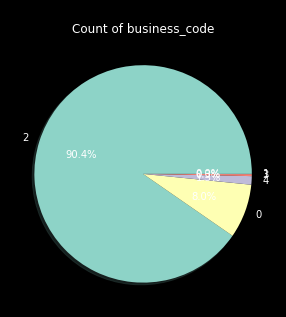

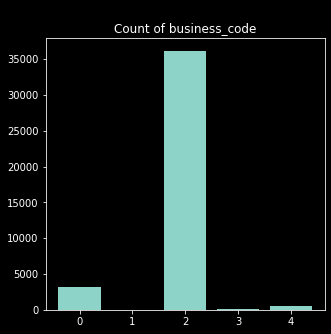

<Figure size 720x720 with 0 Axes>

In [81]:
plt.style.use('dark_background')

fig,ax = plt.subplots(figsize=(5,5))
plt.pie(df['business_code'].value_counts(),labels=df['business_code'].unique(),shadow=True,autopct='%1.1f%%')
plt.title('\nCount of {}'.format('business_code'))
plt.show()



fig,ax = plt.subplots(figsize=(5,5))
plt.bar(list(df['business_code'].value_counts().index),list(df['business_code'].value_counts()))            
plt.title('\nCount of {}'.format('business_code'))
plt.figure(figsize=(10,10))
plt.show()

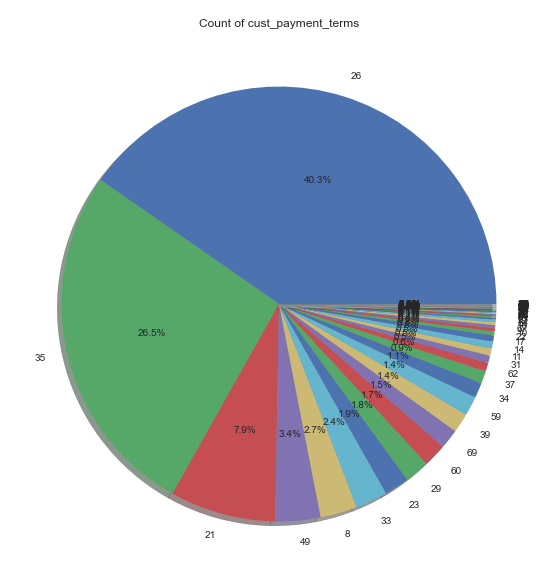

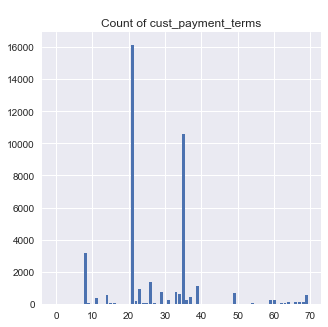

<Figure size 1440x1440 with 0 Axes>

In [82]:
plt.style.use('seaborn')

fig1,ay = plt.subplots(figsize=(10,10))
plt.pie(df['cust_payment_terms'].value_counts(),labels=df['cust_payment_terms'].unique(),shadow=True,autopct='%1.1f%%')
plt.title('\nCount of {}'.format('cust_payment_terms'))
plt.show()


fig1,ay = plt.subplots(figsize=(5,5))
plt.bar(list(df['cust_payment_terms'].value_counts().index),list(df['cust_payment_terms'].value_counts()))            
plt.title('\nCount of {}'.format('cust_payment_terms'))
plt.figure(figsize=(20,20))
plt.show()

### Split Data

In [83]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e delay
X = df.drop('delay',axis=1)

# y --> contains only the target value 
y = df['delay']

In [84]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=0 , shuffle = False)

In [85]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((31994, 17), (7999, 17), (31994,), (7999,))

##### distribution of the target column 
##### gaussian distribution

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delay', ylabel='Density'>

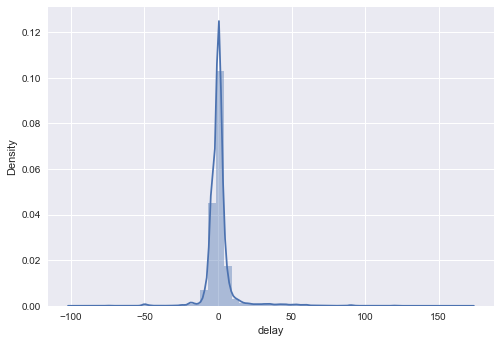

In [86]:

sns.distplot(y_train)

## Feature Selection

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            #square=True, cmap=colormap, linecolor='white', annot=True)

#sns.heatmap(X_train.merge(y_train , on = X_train.index ),annot=True)   

In [ ]:
# also since all the columns have been converted to int/ float , you can use variance threshold -- ;
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.6)
sel.fit(X_train)

In [ ]:
def status_check(traindf = X_train,valdf = X_val,testdf = test):
    print(traindf.info())
    print("****************************")
    print(traindf.shape,valdf.shape,testdf.shape)
    print("************Train Null Count****************")
    print(traindf.isna().sum())
    print("************Test Null Count ****************")
    print(testdf.isna().sum())    
    print("************Val Null Count ****************")
    print(valdf.isna().sum())

In [ ]:

status_check()

### Model Taining

In [ ]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(X_train, y_train)

In [ ]:
y_predict = base_model.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict, squared=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=6)
regressor.fit(X_train, y_train)

In [ ]:
y_predict2 = regressor.predict(X_val)

In [ ]:
mean_squared_error(y_val, y_predict2, squared=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor1 = RandomForestRegressor(random_state=0 , max_depth=6)
regressor1.fit(X_train, y_train)

In [ ]:
y_predict4 = regressor1.predict(X_val)
mean_squared_error(y_val, y_predict4, squared=False)

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbcl = LGBMRegressor(n_estimators=1000, importance_type='gain')
lgbcl.fit(X_train, y_train)

In [ ]:
y_predict3 = lgbcl.predict(X_val)
mean_squared_error(y_val, y_predict3, squared=False)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X_train, y_train, scoring='neg_mean_squared_error')

In [ ]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb_r.fit(X_train, y_train)

In [ ]:
y_predict4 =xgb_r .predict(X_val)
mean_squared_error(y_val, y_predict4, squared=False)